In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('AQI-data.csv')

In [3]:
df = df[df['City']=='Delhi'].reset_index(drop=True)

In [4]:
df.head()

City        Date   PM2.5    PM10     NO    NO2     NOx     NH3     CO  \
0  Delhi  01-01-2015  313.22  607.98  69.16  36.39  110.59   33.85  15.20   
1  Delhi  02-01-2015  186.18  269.55  62.09  32.87   88.14   31.83   9.54   
2  Delhi  03-01-2015   87.18  131.90  25.73  30.31   47.95   69.55  10.61   
3  Delhi  04-01-2015  151.84  241.84  25.01  36.91   48.62  130.36  11.54   
4  Delhi  05-01-2015  146.60  219.13  14.01  34.92   38.25  122.88   9.20   

    SO2     O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0  9.25  41.68    14.36    24.86    9.84  472.0     Severe  
1  6.65  29.97    10.55    20.09    4.29  454.0     Severe  
2  2.65  19.71     3.91    10.23    1.99  143.0   Moderate  
3  4.63  25.36     4.26     9.71    3.34  319.0  Very Poor  
4  3.33  23.20     2.80     6.21    2.96  325.0  Very Poor

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


In [6]:
df['Year'] = df['Date'].dt.year

In [7]:
df.head()

City       Date   PM2.5    PM10     NO    NO2     NOx     NH3     CO  \
0  Delhi 2015-01-01  313.22  607.98  69.16  36.39  110.59   33.85  15.20   
1  Delhi 2015-01-02  186.18  269.55  62.09  32.87   88.14   31.83   9.54   
2  Delhi 2015-01-03   87.18  131.90  25.73  30.31   47.95   69.55  10.61   
3  Delhi 2015-01-04  151.84  241.84  25.01  36.91   48.62  130.36  11.54   
4  Delhi 2015-01-05  146.60  219.13  14.01  34.92   38.25  122.88   9.20   

    SO2     O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  Year  
0  9.25  41.68    14.36    24.86    9.84  472.0     Severe  2015  
1  6.65  29.97    10.55    20.09    4.29  454.0     Severe  2015  
2  2.65  19.71     3.91    10.23    1.99  143.0   Moderate  2015  
3  4.63  25.36     4.26     9.71    3.34  319.0  Very Poor  2015  
4  3.33  23.20     2.80     6.21    2.96  325.0  Very Poor  2015

In [8]:
df.shape

(2009, 17)

### Data Cleaning - Removing Unnecessary Columns

In [9]:
df = df.drop(['City','Date', 'AQI_Bucket'], axis = 1)

In [10]:
df.head()

PM2.5    PM10     NO    NO2     NOx     NH3     CO   SO2     O3  Benzene  \
0  313.22  607.98  69.16  36.39  110.59   33.85  15.20  9.25  41.68    14.36   
1  186.18  269.55  62.09  32.87   88.14   31.83   9.54  6.65  29.97    10.55   
2   87.18  131.90  25.73  30.31   47.95   69.55  10.61  2.65  19.71     3.91   
3  151.84  241.84  25.01  36.91   48.62  130.36  11.54  4.63  25.36     4.26   
4  146.60  219.13  14.01  34.92   38.25  122.88   9.20  3.33  23.20     2.80   

   Toluene  Xylene    AQI  Year  
0    24.86    9.84  472.0  2015  
1    20.09    4.29  454.0  2015  
2    10.23    1.99  143.0  2015  
3     9.71    3.34  319.0  2015  
4     6.21    2.96  325.0  2015

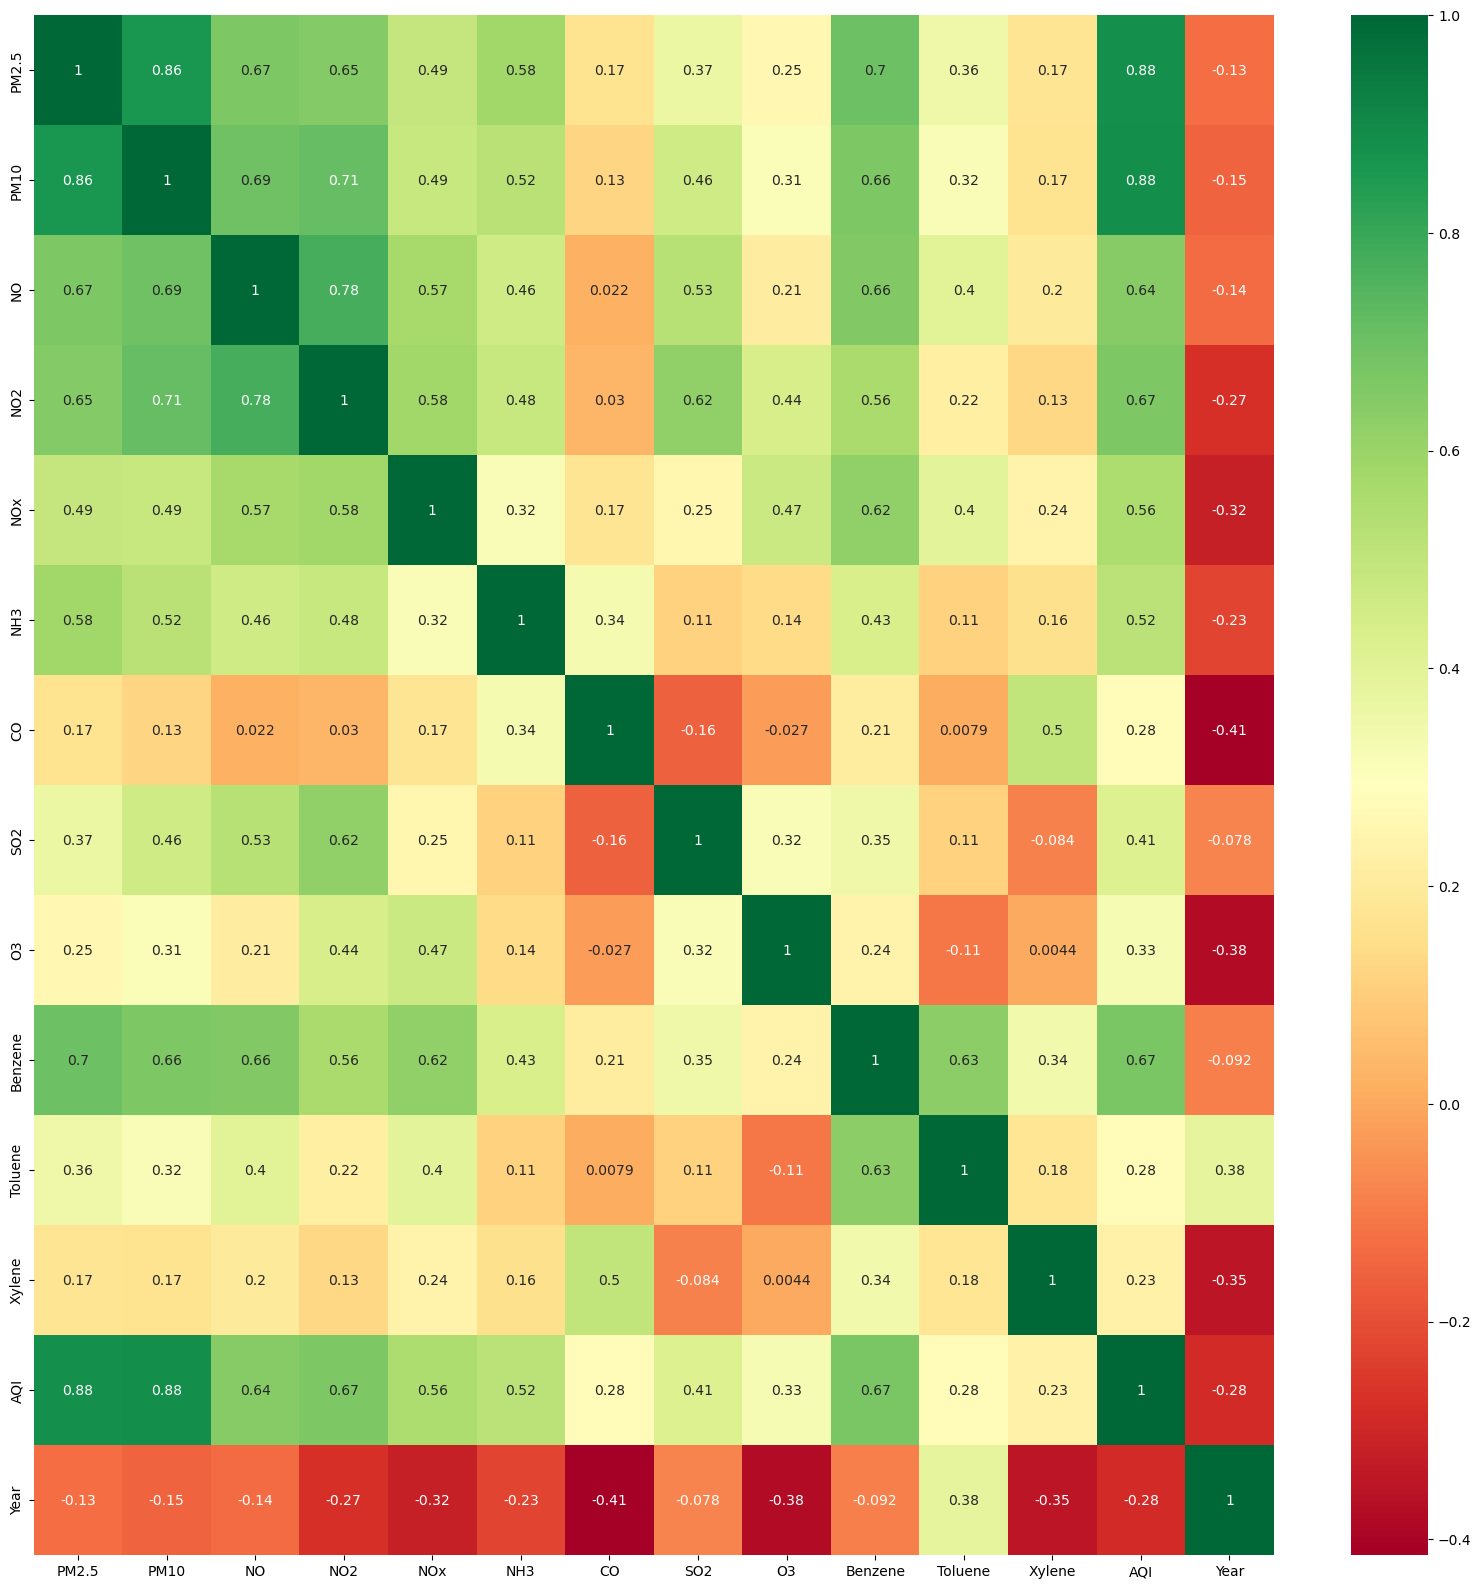

In [11]:
import seaborn as sns
plt.figure(figsize=(20,20))
g=sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

In [12]:
df.isnull().sum()

PM2.5        2
PM10        77
NO           2
NO2          2
NOx          0
NH3          9
CO           0
SO2        110
O3          84
Benzene      0
Toluene      0
Xylene     781
AQI         10
Year         0
dtype: int64

In [13]:
df = df.drop(['Xylene'], axis = 1)

In [14]:
df.head()

PM2.5    PM10     NO    NO2     NOx     NH3     CO   SO2     O3  Benzene  \
0  313.22  607.98  69.16  36.39  110.59   33.85  15.20  9.25  41.68    14.36   
1  186.18  269.55  62.09  32.87   88.14   31.83   9.54  6.65  29.97    10.55   
2   87.18  131.90  25.73  30.31   47.95   69.55  10.61  2.65  19.71     3.91   
3  151.84  241.84  25.01  36.91   48.62  130.36  11.54  4.63  25.36     4.26   
4  146.60  219.13  14.01  34.92   38.25  122.88   9.20  3.33  23.20     2.80   

   Toluene    AQI  Year  
0    24.86  472.0  2015  
1    20.09  454.0  2015  
2    10.23  143.0  2015  
3     9.71  319.0  2015  
4     6.21  325.0  2015

### Detecting Outliers

<Axes: >

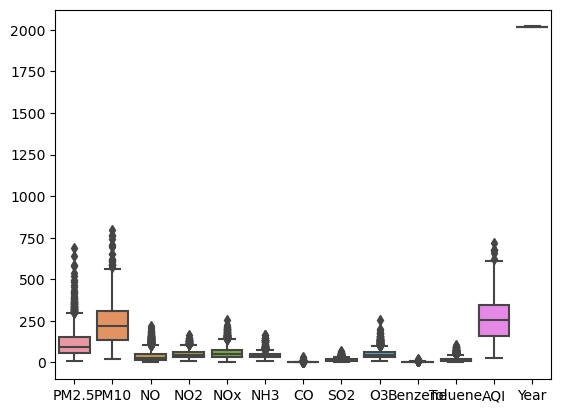

In [15]:
sns.boxplot(df)

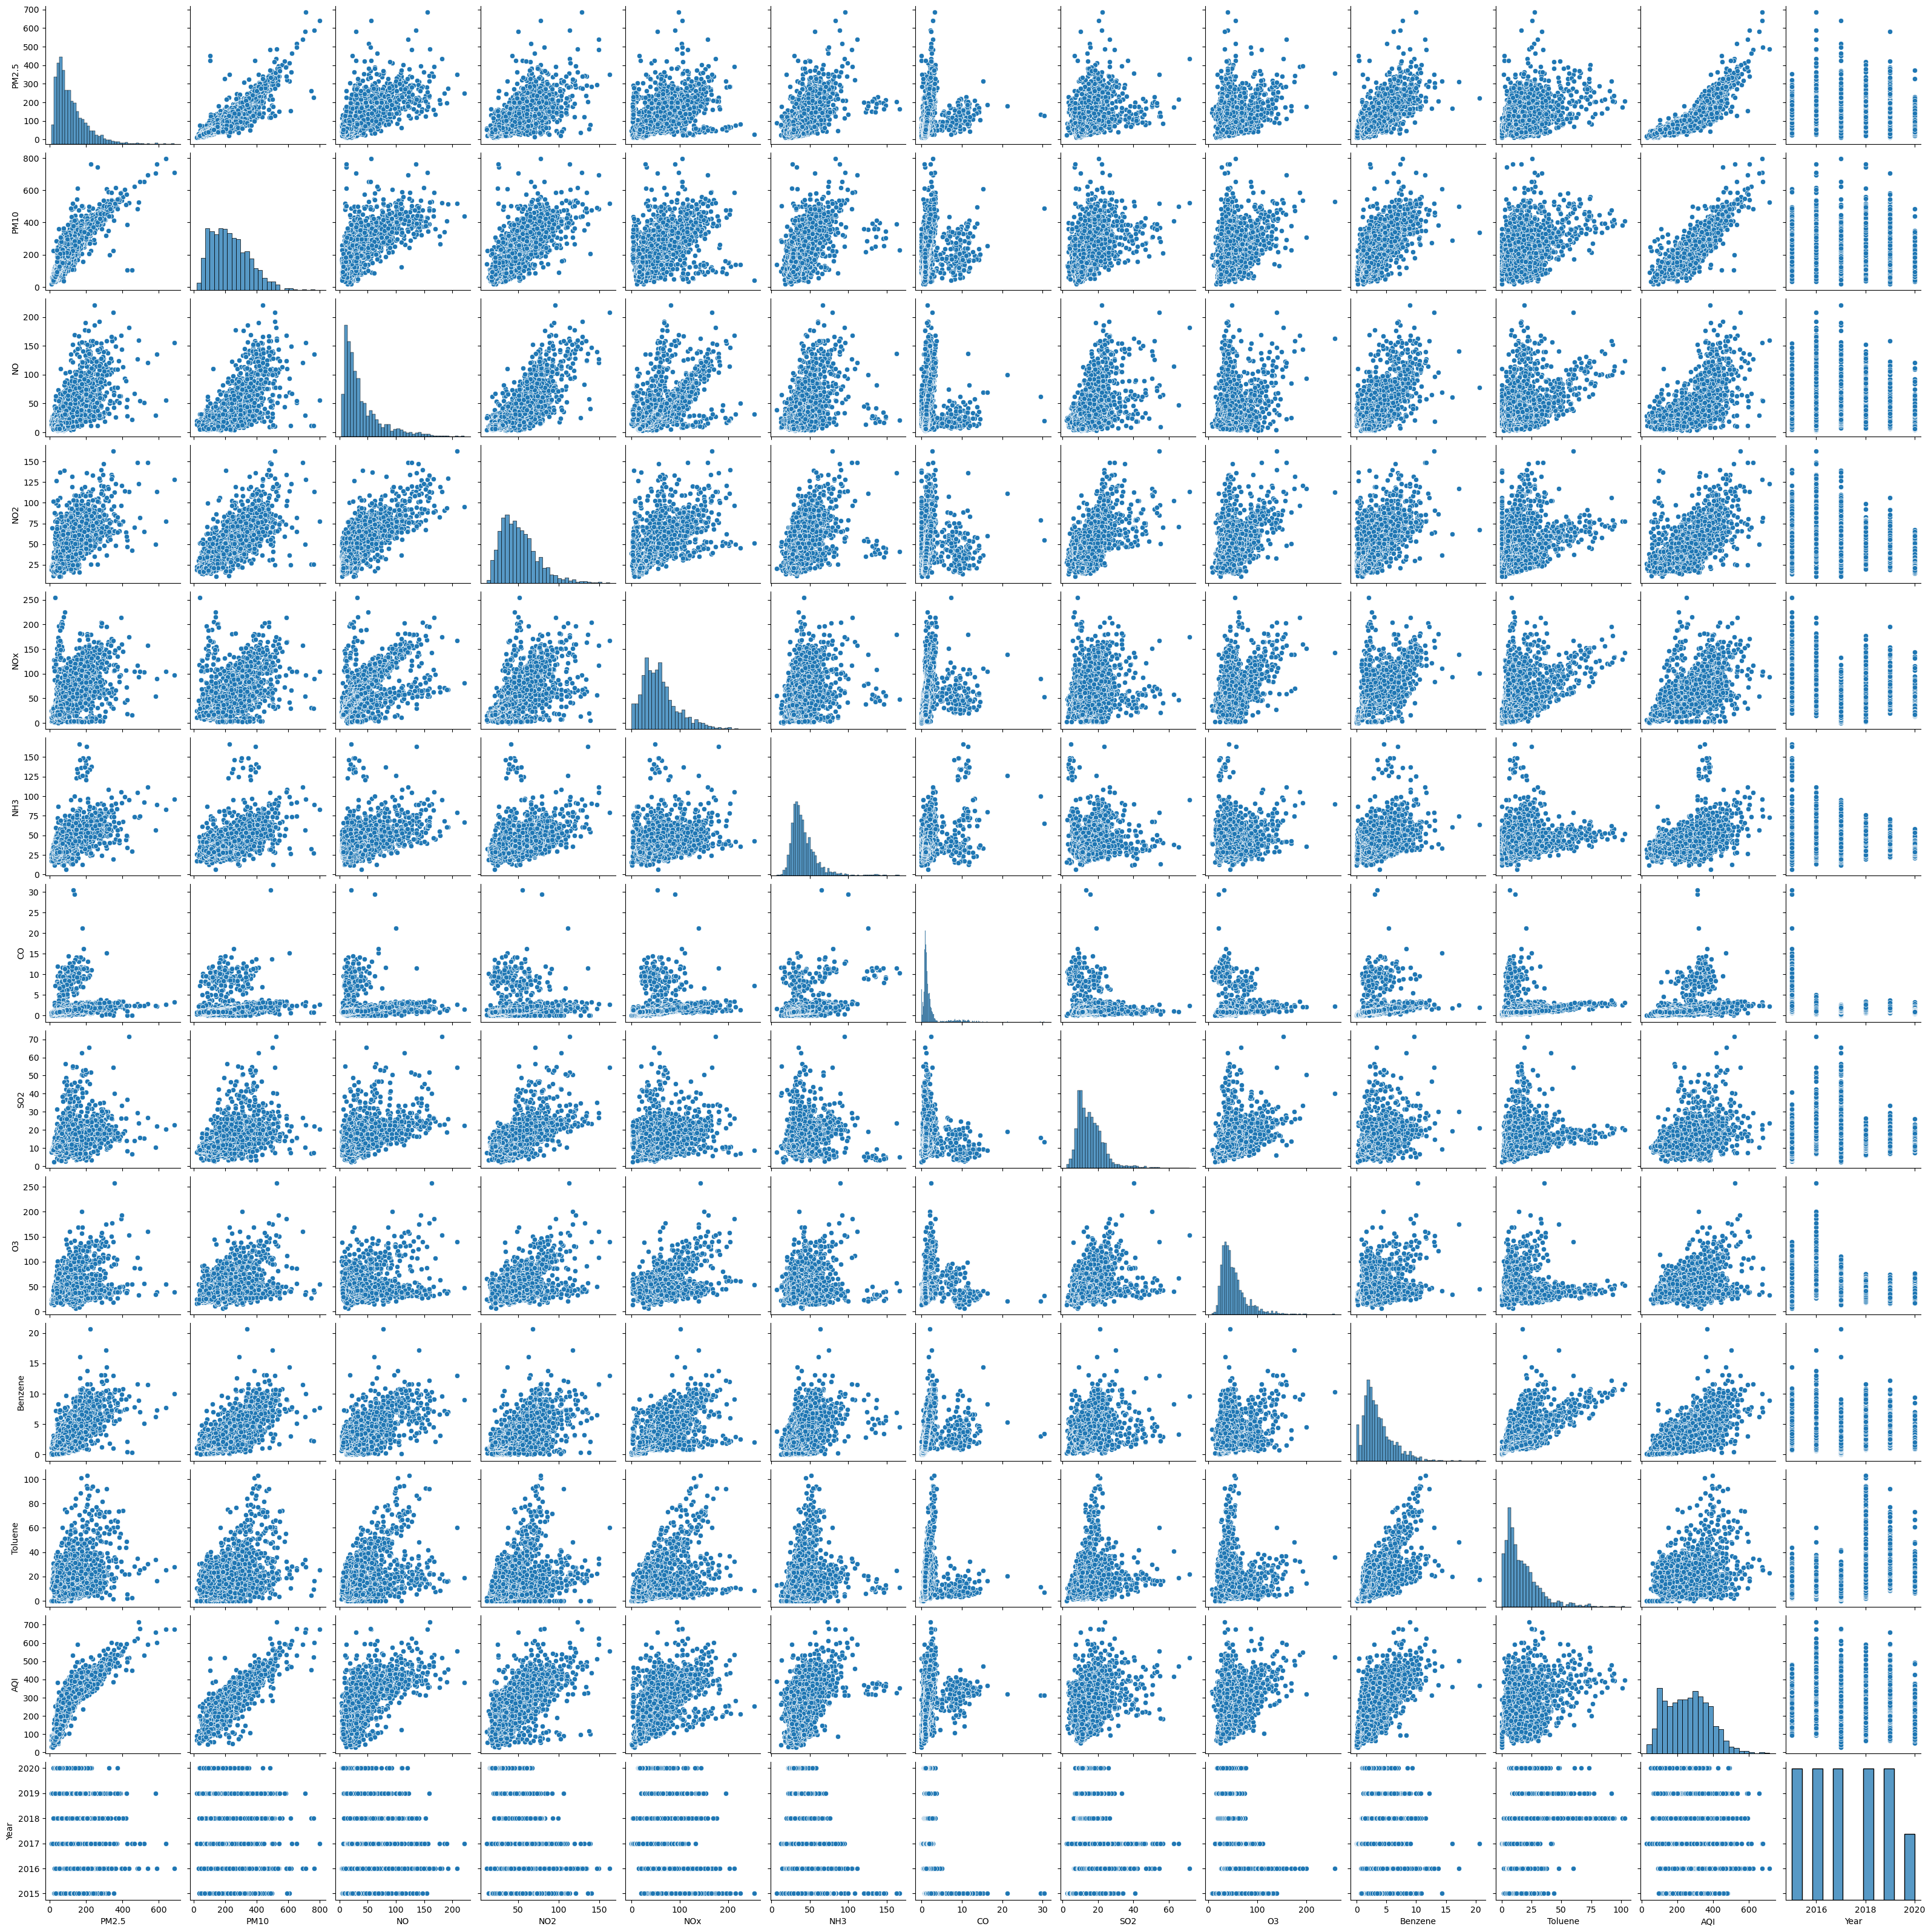

In [16]:
sns.pairplot(df)

In [17]:
df.shape

(2009, 13)

In [18]:
df.columns


Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'AQI', 'Year'],
      dtype='object')

### Removing Outliers

In [19]:
def remove_outliers(df, columns):

    df_no_outliers = df.copy()
    
    for col in columns:
        q1 = df_no_outliers[col].quantile(0.25)
        q3 = df_no_outliers[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)].reset_index(drop=True)
    
    return df_no_outliers


In [20]:
df_new = remove_outliers(df, ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','AQI', 'Year'])
df_new

PM2.5    PM10     NO    NO2    NOx    NH3    CO    SO2     O3  Benzene  \
0     136.05  393.70  45.61  76.88  83.43  46.56  1.38   8.84  58.00     2.75   
1      63.77  166.31  12.93  31.27  34.21  43.33  2.58   5.91  56.84     1.83   
2      83.29  180.06  14.51  36.36  37.13  40.11  1.19   5.52  68.60     1.86   
3      73.70  158.24  24.38  52.90  64.56  41.36  1.36   5.34  53.02     1.71   
4      74.56  121.44  15.90  68.76  71.74  56.02  1.35   5.33  60.88     1.63   
...      ...     ...    ...    ...    ...    ...   ...    ...    ...      ...   
1262   39.80  155.94  10.88  21.46  22.47  31.43  0.87  10.38  18.88     1.69   
1263   59.52  308.65  12.67  21.60  23.86  29.27  0.94  10.70  18.05     1.71   
1264   44.86  184.12  10.50  21.57  21.94  27.97  0.88  11.58  26.61     2.13   
1265   39.80   91.98   5.99  17.96  15.44  28.48  0.84  10.51  37.29     1.57   
1266   54.01  128.66   6.33  21.05  16.81  29.06  0.97  11.15  29.73     2.03   

      Toluene    AQI  Year  
0        6.91  442.0  2015  
1        3.83  309.0  2015  
2        4.50  239.0  2015  
3        5.25  214.0  2015  
4        6.44  166.0  2015  
...       ...    ...   ...  
1262    19.99  112.0  2020  
1263    25.13  196.0  2020  
1264    23.80  233.0  2020  
1265    16.37  114.0  2020  
1266    23.57  101.0  2020  

[1267 rows x 13 columns]

In [21]:
df_new.isnull().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
AQI        0
Year       0
dtype: int64

In [22]:
df = df_new[:]

<Axes: >

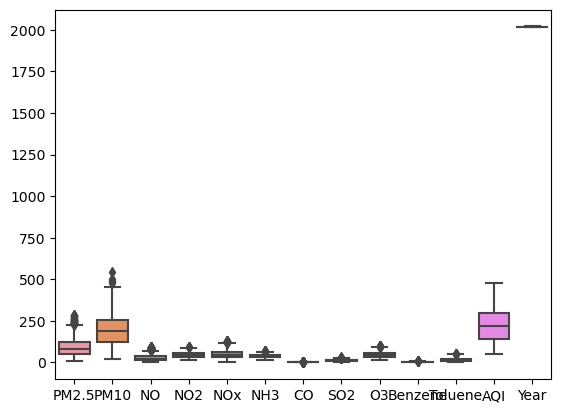

In [23]:
sns.boxplot(df)

In [24]:
df.shape

(1267, 13)

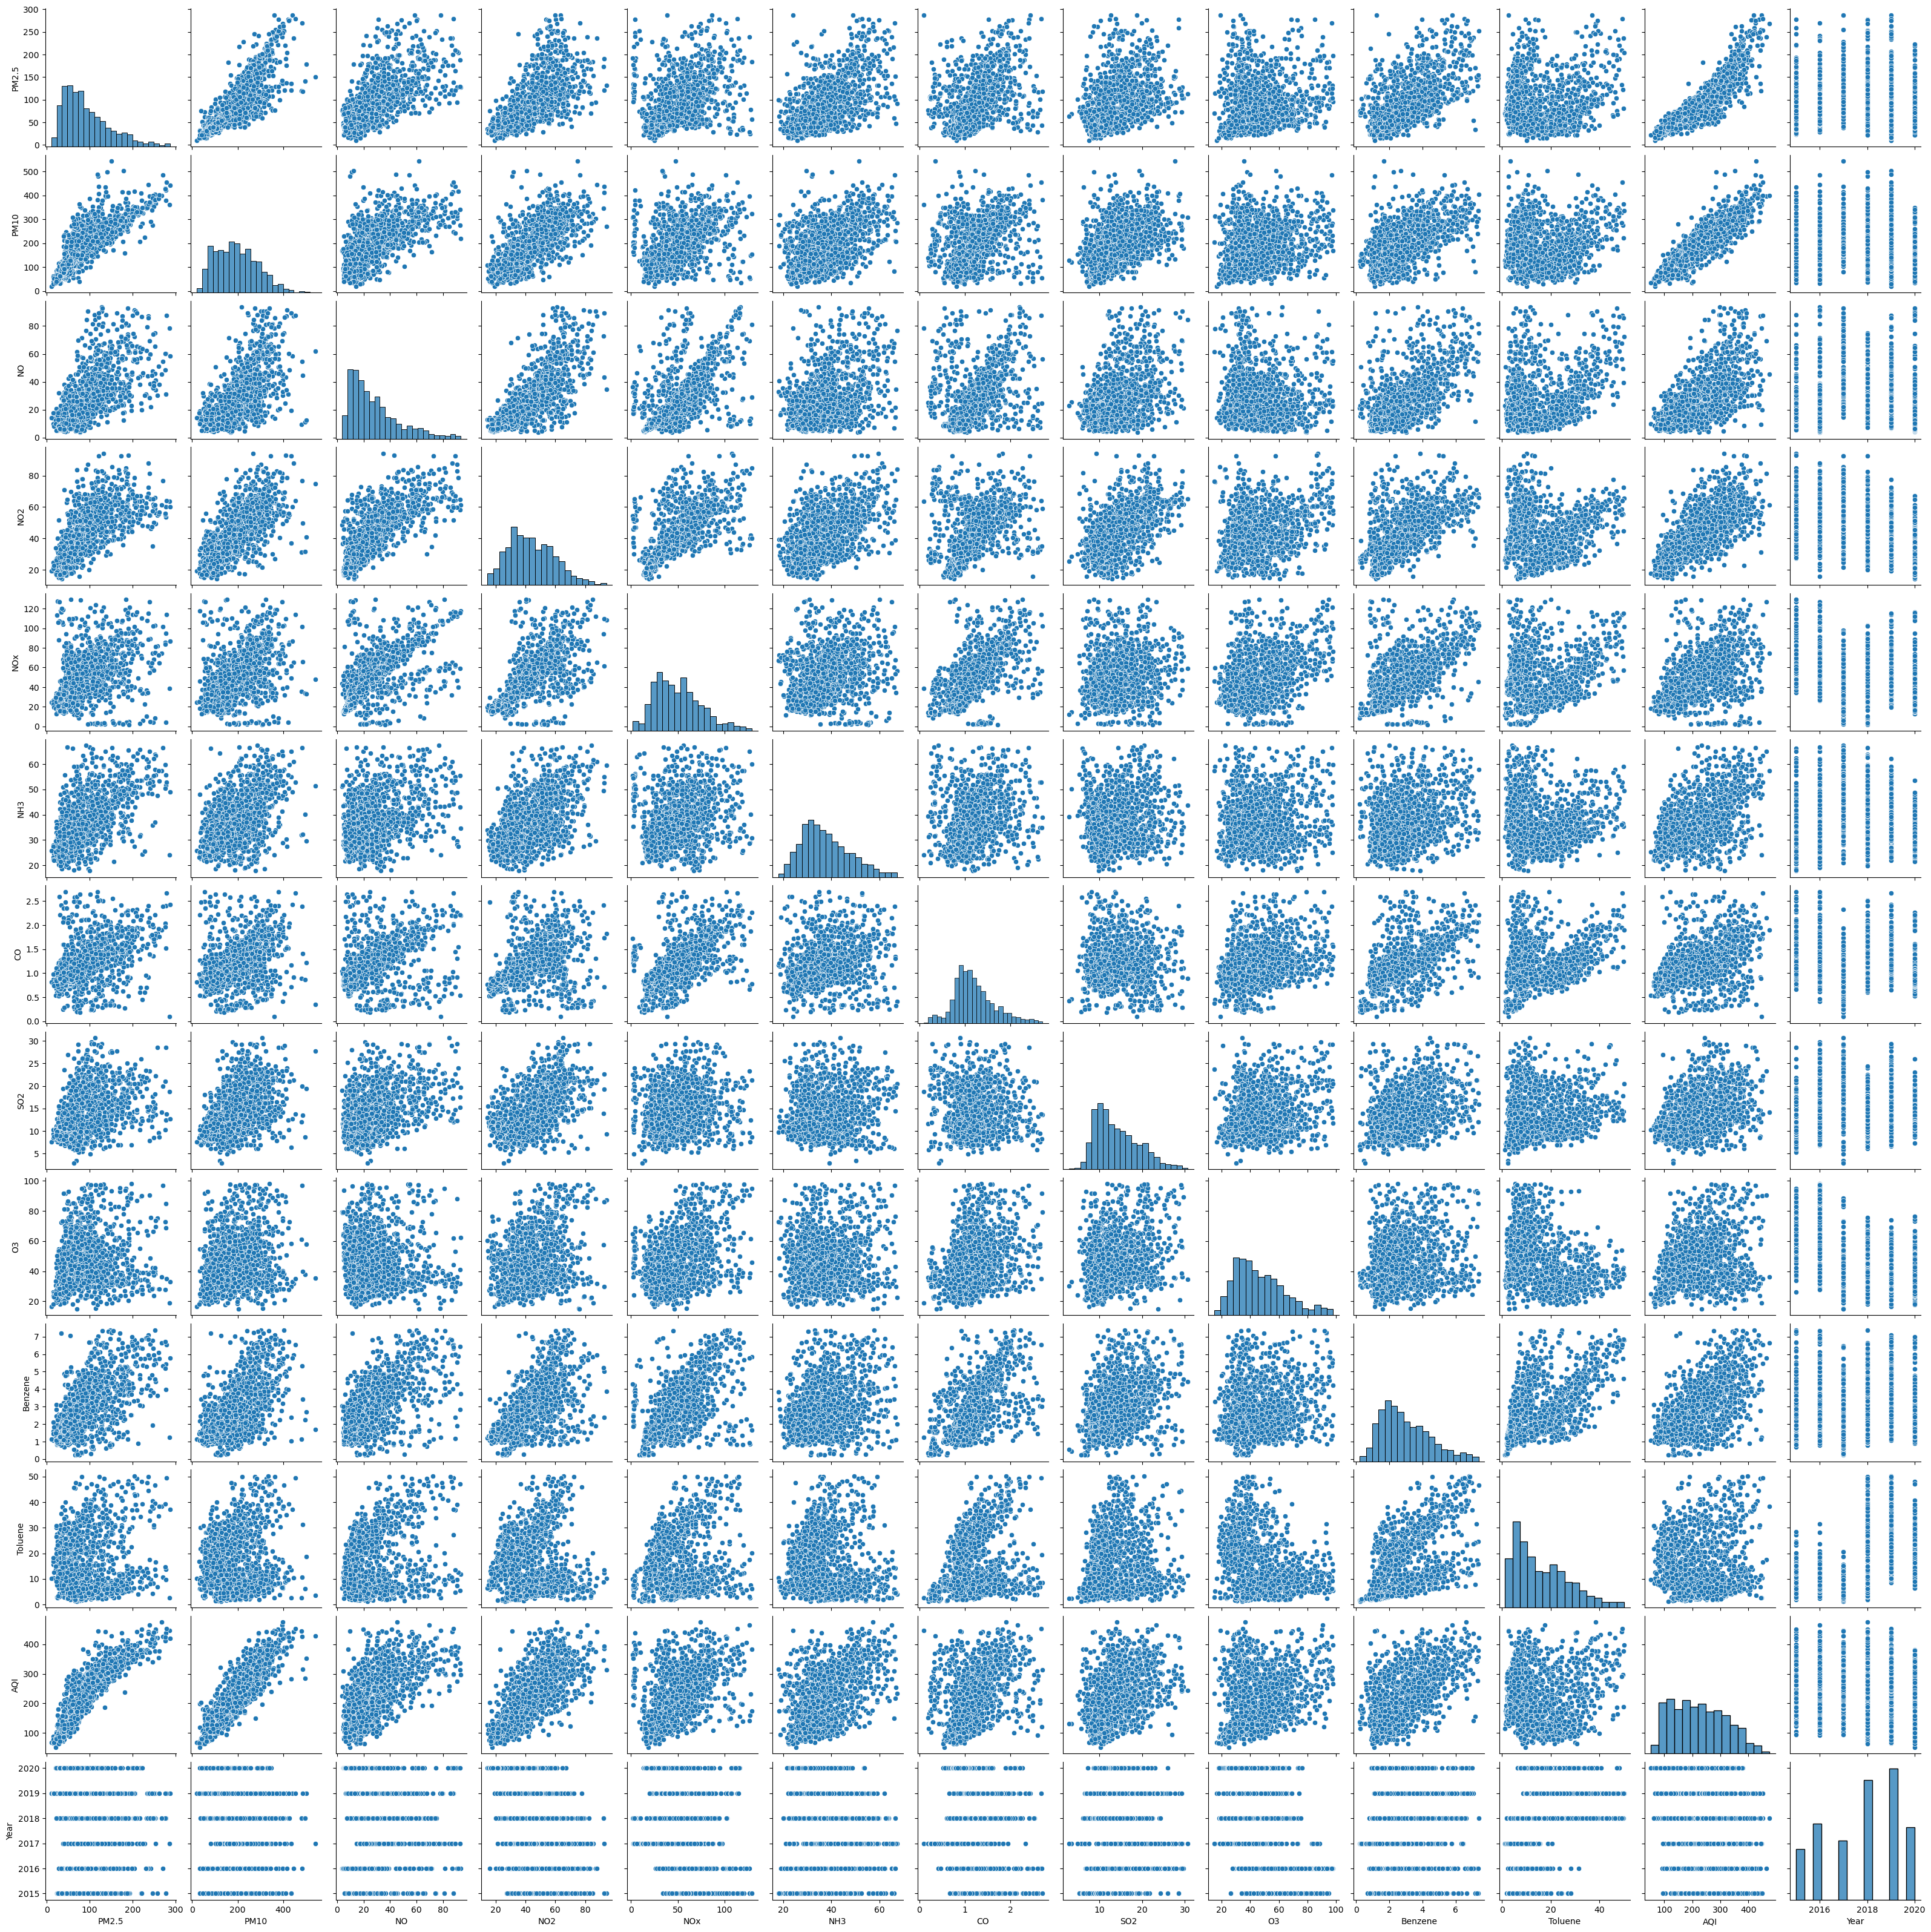

In [26]:
sns.pairplot(df)

In [27]:
df_train =df[(df['Year'] >= 2015) & (df['Year'] <= 2019)]
df_train.shape

(1087, 13)

In [28]:
df_train.head()

PM2.5    PM10     NO    NO2    NOx    NH3    CO   SO2     O3  Benzene  \
0  136.05  393.70  45.61  76.88  83.43  46.56  1.38  8.84  58.00     2.75   
1   63.77  166.31  12.93  31.27  34.21  43.33  2.58  5.91  56.84     1.83   
2   83.29  180.06  14.51  36.36  37.13  40.11  1.19  5.52  68.60     1.86   
3   73.70  158.24  24.38  52.90  64.56  41.36  1.36  5.34  53.02     1.71   
4   74.56  121.44  15.90  68.76  71.74  56.02  1.35  5.33  60.88     1.63   

   Toluene    AQI  Year  
0     6.91  442.0  2015  
1     3.83  309.0  2015  
2     4.50  239.0  2015  
3     5.25  214.0  2015  
4     6.44  166.0  2015

#### Separating Features and Target Value

In [29]:
X = df_train.iloc[:,0:11]
y = df_train.iloc[:,11]

In [30]:
X.head()

PM2.5    PM10     NO    NO2    NOx    NH3    CO   SO2     O3  Benzene  \
0  136.05  393.70  45.61  76.88  83.43  46.56  1.38  8.84  58.00     2.75   
1   63.77  166.31  12.93  31.27  34.21  43.33  2.58  5.91  56.84     1.83   
2   83.29  180.06  14.51  36.36  37.13  40.11  1.19  5.52  68.60     1.86   
3   73.70  158.24  24.38  52.90  64.56  41.36  1.36  5.34  53.02     1.71   
4   74.56  121.44  15.90  68.76  71.74  56.02  1.35  5.33  60.88     1.63   

   Toluene  
0     6.91  
1     3.83  
2     4.50  
3     5.25  
4     6.44

In [31]:
y.head()

0    442.0
1    309.0
2    239.0
3    214.0
4    166.0
Name: AQI, dtype: float64

### Splitting Train and Test Data

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler

#### Performing Scaling of Features

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
print("X_train_scaled: ", X_train_scaled.shape)

X_train_scaled:  (869, 11)


### Implementing Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [69]:
prediction = linear_regressor.predict(X_test_scaled)

### Evaluating the Model

In [71]:
from sklearn.metrics import r2_score
linear_r2 =r2_score(y_test, prediction)
print("R-squared: ",linear_r2)

R-squared:  0.8834935647536376


In [41]:
from sklearn import metrics
linear_mae = metrics.mean_absolute_error(y_test, prediction)
linear_mse = metrics.mean_squared_error(y_test, prediction)
linear_rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction))
print('MAE:', linear_mae)
print('MSE:', linear_mse)
print('RMSE:', linear_rmse)

MAE: 25.645297316055693
MSE: 1066.0214777705578
RMSE: 32.64998434564032


### Implementing Decision Tree Regressor

In [81]:
from sklearn.tree import DecisionTreeRegressor

In [82]:
decision_tree_regressor = DecisionTreeRegressor(random_state=0)
decision_tree_regressor.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=0)

In [74]:
prediction = decision_tree_regressor.predict(X_test_scaled)

### Evaluating the Model

In [76]:
dt_r2 =r2_score(y_test, prediction)
print("R-squared: ",dt_r2)

R-squared:  0.7877485704266911


In [46]:
dt_mae = metrics.mean_absolute_error(y_test, prediction)
dt_mse = metrics.mean_squared_error(y_test, prediction)
dt_rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction))
print('MAE:', dt_mae)
print('MSE:', dt_mse)
print('RMSE:', dt_rmse)

MAE: 33.08715596330275
MSE: 1942.0779816513761
RMSE: 44.06901384931794


### Implementing Random Forest Regressor

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
random_forest_regressor = RandomForestRegressor(random_state=42)
random_forest_regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [79]:
prediction = random_forest_regressor.predict(X_test_scaled)

### Evaluating the Model

In [80]:
random_r2 =r2_score(y_test, prediction)
print("R-squared: ",random_r2)

R-squared:  0.9030729627140163


In [51]:
random_mae = metrics.mean_absolute_error(y_test, prediction)
random_mse = metrics.mean_squared_error(y_test, prediction)
random_rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction))
print('MAE:', random_mae)
print('MSE:', random_mse)
print('RMSE:', random_rmse)

MAE: 22.735183486238533
MSE: 886.8720711009175
RMSE: 29.780397430204278


In [52]:
r2_scores = [linear_r2,dt_r2, random_r2]
labels = ['Linear Regression',  'Decision Tree ', 'Random Forest ']


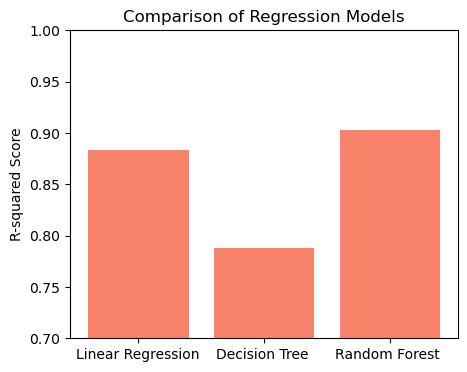

In [62]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.bar(labels, height = r2_scores, color="#F9836A")
ax.set_ylabel('R-squared Score')
ax.set_ylim(0.7, 1)
ax.set_title('Comparison of Regression Models')
plt.show()

In [54]:
mae_scores = [linear_mae, dt_mae, random_mae, ]
labels = ['Linear Regression','Decision Tree ', 'Random Forest ']


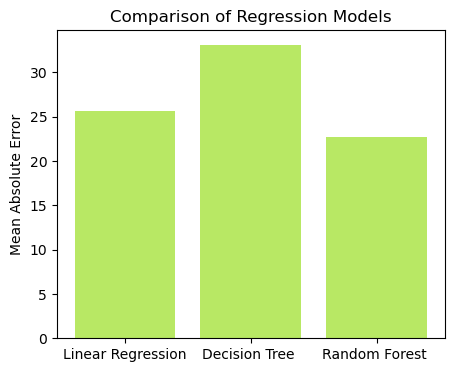

In [63]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.bar(labels,  mae_scores, color="#B8E864")
ax.set_ylabel('Mean Absolute Error')
ax.set_title('Comparison of Regression Models')
plt.show()

In [56]:
mse_scores = [linear_mse, dt_mse, random_mse]
labels = ['Linear Regression', 'Decision Tree ', 'Random Forest ']


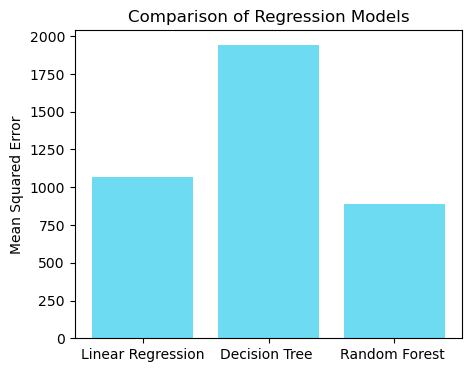

In [64]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.bar(labels,  mse_scores, color="#6DDCF3")
ax.set_ylabel('Mean Squared Error')
ax.set_title('Comparison of Regression Models')
plt.show()

In [58]:
rmse_scores = [linear_rmse, dt_rmse, random_rmse]
labels = ['Linear Regression', 'Decision Tree ', 'Random Forest ']


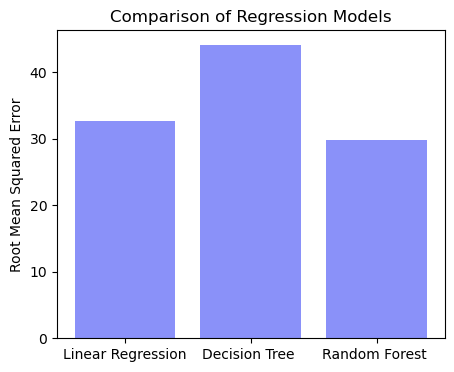

In [65]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.bar(labels,  rmse_scores, color="#8A91F9")
ax.set_ylabel('Root Mean Squared Error')
ax.set_title('Comparison of Regression Models')
plt.show()